In [265]:
import pandas as pd
import numpy as np

In [266]:
path = "/Users/danielalas/Downloads/auto.csv"
df = pd.read_csv(path, header = None)

In [267]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [268]:
df.columns = headers
df.replace("?", np.nan, inplace = True)

In [269]:
missing_data = df.isnull()
cant = len(missing_data)
# print(cant)

# .columns.values.tolist() makes a list of all the column names
for column in missing_data.columns.values.tolist():
    # .value_counts() separates and counts each value (in this case True or False)
    count = missing_data[column].value_counts()
    # Only prints the columns with nan values
    false = count[0]
    if false != cant:
        print(column)
        print(count)
        print("") 

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

bore
False    201
True       4
Name: bore, dtype: int64

stroke
False    201
True       4
Name: stroke, dtype: int64

horsepower
False    203
True       2
Name: horsepower, dtype: int64

peak-rpm
False    203
True       2
Name: peak-rpm, dtype: int64

price
False    201
True       4
Name: price, dtype: int64



In [270]:
# Sets the average value of the column into the nan values
def set_avg_nan(df,column):
    try:
        avg = df[column].astype("float").mean(axis=0)
        df[column].replace(np.nan,avg, inplace=True)
        print(f"Success ({column})")
    except:
        print(f"Error... do it manually ({column}")

In [271]:
set_avg_nan(df,"normalized-losses")
set_avg_nan(df,"bore")
set_avg_nan(df,"stroke")
set_avg_nan(df,"horsepower")
set_avg_nan(df,"peak-rpm")

Success (normalized-losses)
Success (bore)
Success (stroke)
Success (horsepower)
Success (peak-rpm)


In [273]:
# idxmax() checks the most common type
idxmax = df['num-of-doors'].value_counts().idxmax()
df['num-of-doors'].replace(np.nan, idxmax, inplace = True)

In [274]:
df.dropna(axis=0, inplace = True)

In [275]:
# reset index, because we droped some rows
df.reset_index(drop=True, inplace=True)

In [276]:
# Data Format
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [277]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
df[["horsepower"]] = df[["horsepower"]].astype("int")

In [278]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [ ]:
# Data Standardization
df['city-mpg'] = 235/df["city-mpg"]
df.rename(columns = {"city-mpg": "city-L/100km"}, inplace = True)
df.head()

In [283]:
df['highway-mpg'] = 235/df["highway-mpg"]
df.rename(columns = {"highway-mpg" : "highway-L/100km"},inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19.0,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,7.833333,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18.0,10.681818,17450.0


In [284]:
# Data Normalization (0 - 1)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


In [286]:
# Binning

# Divide it innto 3 bins
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
group_names = ['Low','Medium','High']

In [287]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names ,include_lowest = True)
binsCount = df["horsepower-binned"].value_counts()
print(binsCount)

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64


Text(0.5, 1.0, 'horsepower bins')

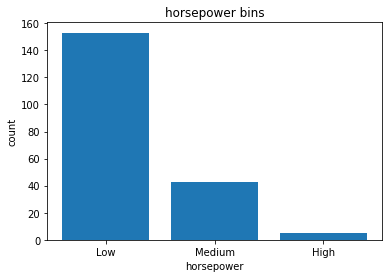

In [288]:
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [289]:
# Indicator Variable (Dummy variables)
dummy_fuel_type = pd.get_dummies(df["fuel-type"])
dummy_fuel_type.head()

dummy_fuel_type.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)

df = pd.concat([df, dummy_fuel_type], axis=1)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000.0,21.0,8.703704,13495.0,Low,0,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000.0,21.0,8.703704,16500.0,Low,0,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000.0,19.0,9.038462,16500.0,Medium,0,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500.0,24.0,7.833333,13950.0,Low,0,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500.0,18.0,10.681818,17450.0,Low,0,1


In [290]:
df.drop("fuel-type", axis = 1, inplace=True)

In [291]:
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,21.0,8.703704,13495.0,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,21.0,8.703704,16500.0,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,19.0,9.038462,16500.0,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,24.0,7.833333,13950.0,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,18.0,10.681818,17450.0,Low,0,1


In [292]:
dummy_aspiration = pd.get_dummies(df["aspiration"])
dummy_aspiration.rename(columns={'std':'aspiration-std', 'turbo':'aspiration-turbo'}, inplace=True)

dummy_aspiration.head()
df = pd.concat([df, dummy_aspiration], axis=1)
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21.0,8.703704,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21.0,8.703704,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19.0,9.038462,16500.0,Medium,0,1,1,0
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24.0,7.833333,13950.0,Low,0,1,1,0
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18.0,10.681818,17450.0,Low,0,1,1,0


In [295]:
df.drop("aspiration", axis = 1, inplace=True)

In [296]:
df.head(5)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21.0,8.703704,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21.0,8.703704,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,19.0,9.038462,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,24.0,7.833333,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,18.0,10.681818,17450.0,Low,0,1,1,0
